In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/LearnPythonWithRune/MachineLearningWithPython/main/jupyter/final/files/weather.csv', parse_dates = True,index_col=0)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes


In [ ]:
data.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [ ]:
dataset = data[['Temp3pm', 'WindSpeed3pm', 'RainTomorrow']]
dataset

,Temp3pm,WindSpeed3pm,RainTomorrow
Date,,,
2008-02-01,20.9,20.0,Yes
2008-02-02,24.8,13.0,Yes
2008-02-03,23.0,2.0,Yes
2008-02-04,20.9,20.0,Yes
2008-02-05,25.5,6.0,Yes
...,...,...,...
2017-06-21,17.9,20.0,No
2017-06-22,18.7,7.0,No
2017-06-23,17.3,13.0,No


In [ ]:
dataset_clean = dataset.dropna()

x = dataset_clean[['Temp3pm', 'WindSpeed3pm']]
y = dataset_clean['RainTomorrow']
y = np.array([0 if value == 'No' else 1 for value in y])
sum(y == 0)/len(y)

0.7406287787182587

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [ ]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.6952841596130592

In [ ]:
X_map = np.random.rand(10000, 2)
X_map = X_map*(30, 30)
X_map

array([[ 8.40049312, 10.23304204],
       [29.63038677, 26.32458826],
       [ 2.0408953 , 22.10473332],
       ...,
       [ 2.60393808,  0.85557027],
       [18.34722025,  3.74391932],
       [18.06582574, 15.6658838 ]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


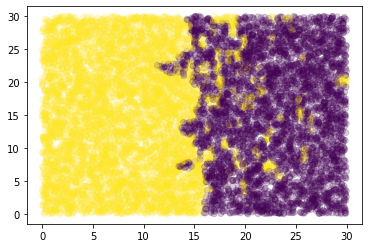

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
y_map = neigh.predict(X_map)
ax.scatter(x=X_map[:, 0], y=X_map[:, 1], c=y_map, alpha=0.2)